In [14]:
from sklearn.datasets import load_iris
import torch

In [15]:
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [16]:
iris = load_iris()
X = iris.data
y = (iris.target).astype(float) 

In [17]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.long)

In [21]:
class IrisNetMultiClass(nn.Module):
    def __init__(self, input_dim):
        super(IrisNetMultiClass, self).__init__()
        self.layer1 = nn.Linear(input_dim, 3)
        self.layer2 = nn.Linear(3, 2)
        self.output = nn.Linear(2, 3)

    def forward(self, x):
        x=self.layer1(x)
        x=torch.relu(x)
        x=self.layer2(x)
        x=torch.relu(x)
        # prediction= nn.LogSoftmax(x)
        return self.output(x)

In [22]:
test_model=IrisNetMultiClass(input_dim=4)

In [23]:
test_input=X_train_tensor[0].view(1,-1)
model = IrisNetMultiClass(input_dim=4)
prediction=model.forward(test_input)
prediction

tensor([[ 0.5823,  1.0810, -0.3506]], grad_fn=<AddmmBackward0>)

In [24]:
model = IrisNetMultiClass(input_dim=4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [36]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    # print(outputs)
    #break
    loss = criterion(outputs, y_train_tensor.view(-1))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [31]:
inp = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
loss = nn.CrossEntropyLoss()
output = loss(inp, target)

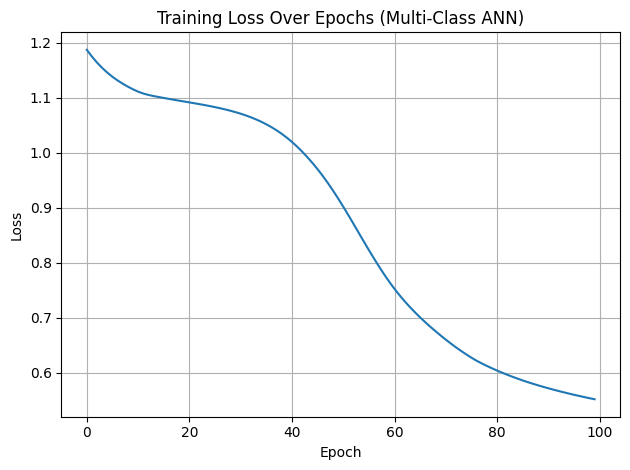

In [37]:
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs (Multi-Class ANN)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predictions = torch.max(test_outputs, 1)
    accuracy = (predictions == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 10.60


In [45]:
_, predictions=torch.max(test_outputs,1)

In [46]:
predictions

tensor([2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])

In [52]:
(predictions == y_test_tensor.view(-1)).sum().item()

22

In [53]:
 y_test_tensor.size(0)

30

In [54]:
(predictions == y_test_tensor.view(-1)).sum().item()/ y_test_tensor.size(0)

0.7333333333333333